<a href="https://colab.research.google.com/github/joezerr/Project/blob/main/No_2_FFT_butterworth_%7C_UTS_Computer_Vision_%7C_2440057672.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT LIBRARIES**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow #used to show image since cv2.imshow isnt applicable in google colab

In [ ]:
source = '/content/noisy_lena.png' #ill be using panda image. The next step is to make it grayscale
image=cv2.imread(source,0)

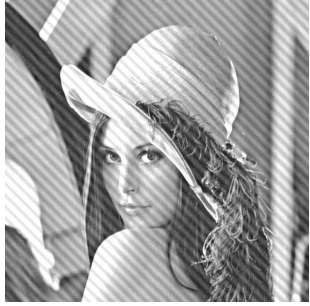

In [ ]:
cv2_imshow(image)

In [ ]:
#appied image transformation using fft.fft2 into frequency domain
fft_image = np.fft.fft2(image)

In [ ]:
#make a shift
Fshift = np.fft.fftshift(fft_image)

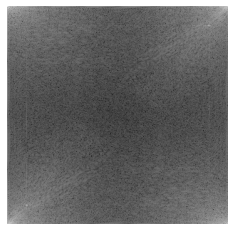

In [ ]:
#transformed image
plt.imshow(np.log1p(np.abs(fft_image)), cmap='gray')
plt.axis('off')
plt.show()

**Butterworth**

In [ ]:
#butterworth
M,N = image.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 30 # cut of frequency
n = 30 # order 
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        H[u,v] = 1 / (1 + (D/D0)**n)

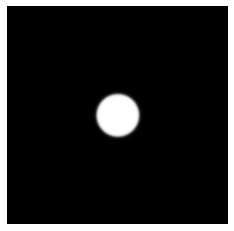

In [ ]:
#filter 
plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
#shift back into frequency domain image filter
Gshift = Fshift * H
G = np.fft.ifftshift(Gshift)
g = np.abs(np.fft.ifft2(G))

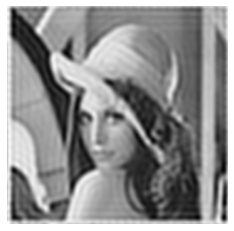

In [ ]:
#end result
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

*periodic noises in lena's image is already removed though the image appears to be more blurred*